## MNIST dataset

In [5]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from create_views import create_views_pca, create_views_feature_split, create_views_rotation, create_views_flip, create_views_kernel_pca, add_noise
from evaluate import cross_validate_linear_subspace
import numpy as np

In [50]:
# Load and preprocess the MNIST dataset
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
if isinstance(X_mnist, pd.DataFrame):  # Check if X is a DataFrame
    X_mnist = X_mnist.values  # Convert DataFrame to NumPy array
X_mnist = X_mnist / 255.0  # Normalize to [0, 1]

# Create two views of the data
X1_mnist, X2_mnist = create_views_pca(X_mnist, n_components=64)

In [9]:
results = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.95, concatenate=False, p=32, m=32)


--- Fold 1 ---
X1_train_unlabeled (53199, 32)
X2_train_unlabeled (53199, 32)
Transformed Model - Fold 1: Accuracy=0.8885, Precision=0.8884, Recall=0.8885, F1=0.8883
[[1256    0    7    6    3   31   21    7   11    1]
 [   1 1532    5   13    2   10    1    6   28    2]
 [  17   19 1190   36   14    9   25   27   35    8]
 [   4   18   35 1238    0   63   14   27   19   15]
 [   1    4   23    5 1143    1   20    5   10   83]
 [  19   13   11   61   21 1043   16   14   55   20]
 [   8    4   38    2   17   20 1295    6    5    1]
 [   4   13   26    6   17    2    1 1378    6   50]
 [   7   32   31   83    6   40    7   13 1112   26]
 [   8   10   12   13   39    8    0   53   25 1252]]
Baseline Model - Fold 1: Accuracy=0.8885, Precision=0.8884, Recall=0.8885, F1=0.8883

--- Fold 2 ---
X1_train_unlabeled (53199, 32)
X2_train_unlabeled (53199, 32)
Transformed Model - Fold 2: Accuracy=0.8859, Precision=0.8858, Recall=0.8859, F1=0.8856
[[1337    0   23    5    8   37   10    6    9    0]

In [12]:
results2 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.97, concatenate=False, p=32, m=32)


--- Fold 1 ---
X1_train_unlabeled (54319, 32)
X2_train_unlabeled (54319, 32)
Transformed Model - Fold 1: Accuracy=0.8756, Precision=0.8758, Recall=0.8756, F1=0.8755
[[1244    1    6   10    2   30   23   16   11    0]
 [   1 1533    6    8    2   11    1    6   29    3]
 [  28   17 1147   23   24   10   20   39   67    5]
 [   7   19   30 1198    3   87   14   31   30   14]
 [   1    4   14    4 1118    4   24    3   23  100]
 [  14   15    8   58   24 1023   18   15   68   30]
 [  13    7   24    1   15   39 1278    3   16    0]
 [   5    7   25    5   14   11    3 1377    0   56]
 [  10   25   29   72   10   51   12   13 1114   21]
 [  10    9   14   11   49   12    0   62   26 1227]]
Baseline Model - Fold 1: Accuracy=0.8756, Precision=0.8758, Recall=0.8756, F1=0.8755

--- Fold 2 ---
X1_train_unlabeled (54319, 32)
X2_train_unlabeled (54319, 32)
Transformed Model - Fold 2: Accuracy=0.8750, Precision=0.8753, Recall=0.8750, F1=0.8745
[[1341    0   17    7    8   39   14    0    9    0]

In [13]:
results3 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.99, concatenate=False, p=32, m=32)


--- Fold 1 ---
X1_train_unlabeled (55439, 32)
X2_train_unlabeled (55439, 32)
Transformed Model - Fold 1: Accuracy=0.8511, Precision=0.8519, Recall=0.8511, F1=0.8507
[[1212    0    6   23    2   57   21    8   10    4]
 [   3 1532    3    6    5   17    1    4   25    4]
 [  17   29 1118   30   41   11   18   46   61    9]
 [  23   18   28 1146    3  113   24   34   23   21]
 [   2    2   11    6 1163    7    8    5   11   80]
 [  17   28    7   63   34 1008   23    9   55   29]
 [  16    8   20    1   16   52 1254    1   27    1]
 [   5   19   22    7   17    7    1 1364    9   52]
 [  35   51   20   68   18   86   11   19 1018   31]
 [   8   13   14   21  112   23    7   99   22 1101]]
Baseline Model - Fold 1: Accuracy=0.8511, Precision=0.8519, Recall=0.8511, F1=0.8507

--- Fold 2 ---
X1_train_unlabeled (55439, 32)
X2_train_unlabeled (55439, 32)
Transformed Model - Fold 2: Accuracy=0.8501, Precision=0.8502, Recall=0.8501, F1=0.8496
[[1308    0   16   23    5   46   15   11   10    1]

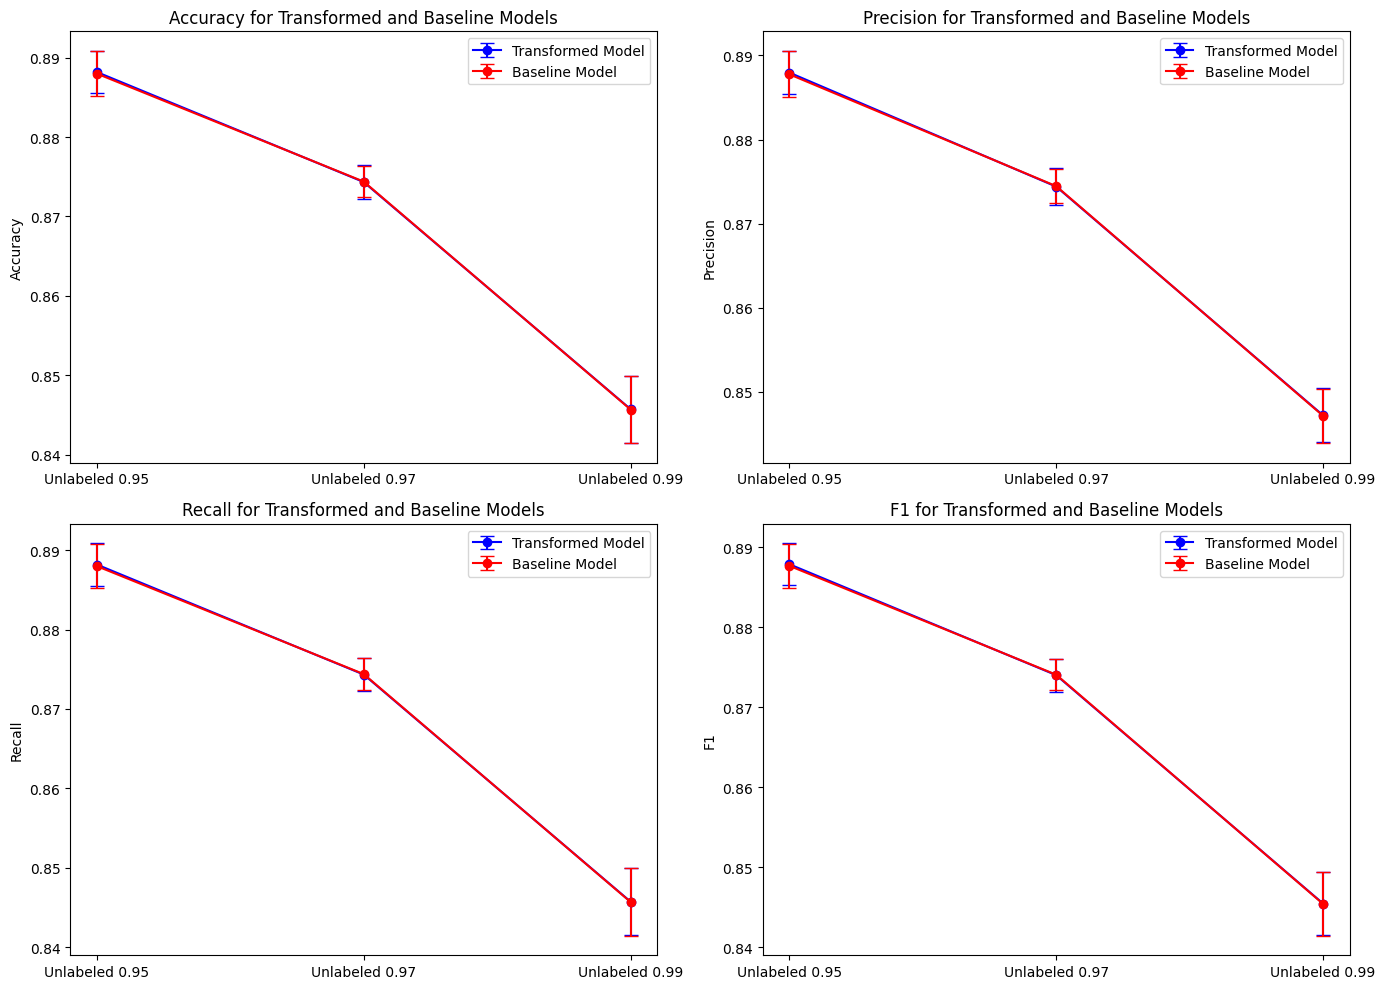

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant metrics (accuracy, precision, recall, f1) from results, results2, results3
metrics = ['accuracy', 'precision', 'recall', 'f1']
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']  # assuming 5-fold cross-validation

# Function to calculate means and std for error bars
def get_mean_std(results, metric):
    return np.mean(results[metric]), np.std(results[metric])

# Initialize lists to store mean and std for each metric
means = {metric: [] for metric in metrics}
stds = {metric: [] for metric in metrics}
baseline_means = {metric: [] for metric in metrics}
baseline_stds = {metric: [] for metric in metrics}

# Calculate mean and std for each metric (including baseline)
for metric in metrics:
    means[metric].append(get_mean_std(results['transformed'], metric))
    means[metric].append(get_mean_std(results2['transformed'], metric))
    means[metric].append(get_mean_std(results3['transformed'], metric))

    baseline_means[metric].append(get_mean_std(results['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results2['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results3['baseline'], metric))

    stds[metric].append(np.std(results['transformed'][metric]))
    stds[metric].append(np.std(results2['transformed'][metric]))
    stds[metric].append(np.std(results3['transformed'][metric]))

    baseline_stds[metric].append(np.std(results['baseline'][metric]))
    baseline_stds[metric].append(np.std(results2['baseline'][metric]))
    baseline_stds[metric].append(np.std(results3['baseline'][metric]))

# Create a figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop over the metrics and plot
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]  # Find the correct axis (2x2 grid)
    
    # Extract means and stds for the metric
    mean_values = [means[metric][0][0], means[metric][1][0], means[metric][2][0]]
    std_values = [stds[metric][0], stds[metric][1], stds[metric][2]]
    
    # Extract baseline means and stds
    baseline_mean_values = [baseline_means[metric][0][0], baseline_means[metric][1][0], baseline_means[metric][2][0]]
    baseline_std_values = [baseline_stds[metric][0], baseline_stds[metric][1], baseline_stds[metric][2]]
    
    # Plot transformed model with error bars
    ax.errorbar([0, 1, 2], mean_values, yerr=std_values, fmt='-o', color='blue', label='Transformed Model', capsize=5)
    
    # Plot baseline model with error bars
    ax.errorbar([0, 1, 2], baseline_mean_values, yerr=baseline_std_values, fmt='-o', color='red', label='Baseline Model', capsize=5)
    
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Unlabeled 0.95', 'Unlabeled 0.97', 'Unlabeled 0.99'])
    ax.set_title(f'{metric.capitalize()} for Transformed and Baseline Models')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [51]:
# for the group report
results11 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.9, concatenate=False, p=32, m=32)
results22 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.95, concatenate=False, p=32, m=32)
results33 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.98, concatenate=False, p=32, m=32)


--- Fold 1 ---
X1_train_unlabeled (50400, 32)
X2_train_unlabeled (50400, 32)
Transformed Model - Fold 1: Accuracy=0.8987, Precision=0.8986, Recall=0.8987, F1=0.8986
[[1282    0    6    4    1   19   16    5    9    1]
 [   0 1537    6   10    2   10    2    7   24    2]
 [  10   16 1211   25   19   12   22   22   36    7]
 [   5   13   31 1248    1   58   13   27   24   13]
 [   3    4   17   11 1158    2   15    7    8   70]
 [  10    5   14   62   22 1075   14   11   46   14]
 [   4    2   32    1   15   25 1304    3    9    1]
 [   5    3   27    4    8    6    0 1396    3   51]
 [   8   36   22   65    7   58    9   11 1125   16]
 [   5   13   10   19   47   11    0   55   13 1247]]
Baseline Model - Fold 1: Accuracy=0.8988, Precision=0.8987, Recall=0.8988, F1=0.8986

--- Fold 2 ---
X1_train_unlabeled (50400, 32)
X2_train_unlabeled (50400, 32)
Transformed Model - Fold 2: Accuracy=0.8989, Precision=0.8986, Recall=0.8989, F1=0.8985
[[1353    0    9    5    7   32   14    3   12    0]

In [55]:
results11 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.95, concatenate=False, p=10, m=32)
results22 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.97, concatenate=False, p=10, m=32)
results33 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.99, concatenate=False, p=10, m=32)


--- Fold 1 ---
X1_train_unlabeled (53199, 32)
X2_train_unlabeled (53199, 32)
Transformed Model - Fold 1: Accuracy=0.6884, Precision=0.6829, Recall=0.6884, F1=0.6844
[[1256    0    7    6    3   31   21    7   11    1]
 [   1 1532    5   13    2   10    1    6   28    2]
 [  17   19 1190   36   14    9   25   27   35    8]
 [   4   18   35 1238    0   63   14   27   19   15]
 [   1    4   23    5 1143    1   20    5   10   83]
 [  19   13   11   61   21 1043   16   14   55   20]
 [   8    4   38    2   17   20 1295    6    5    1]
 [   4   13   26    6   17    2    1 1378    6   50]
 [   7   32   31   83    6   40    7   13 1112   26]
 [   8   10   12   13   39    8    0   53   25 1252]]
Baseline Model - Fold 1: Accuracy=0.8885, Precision=0.8884, Recall=0.8885, F1=0.8883

--- Fold 2 ---
X1_train_unlabeled (53199, 32)
X2_train_unlabeled (53199, 32)
Transformed Model - Fold 2: Accuracy=0.6829, Precision=0.6758, Recall=0.6829, F1=0.6779
[[1337    0   23    5    8   37   10    6    9    0]

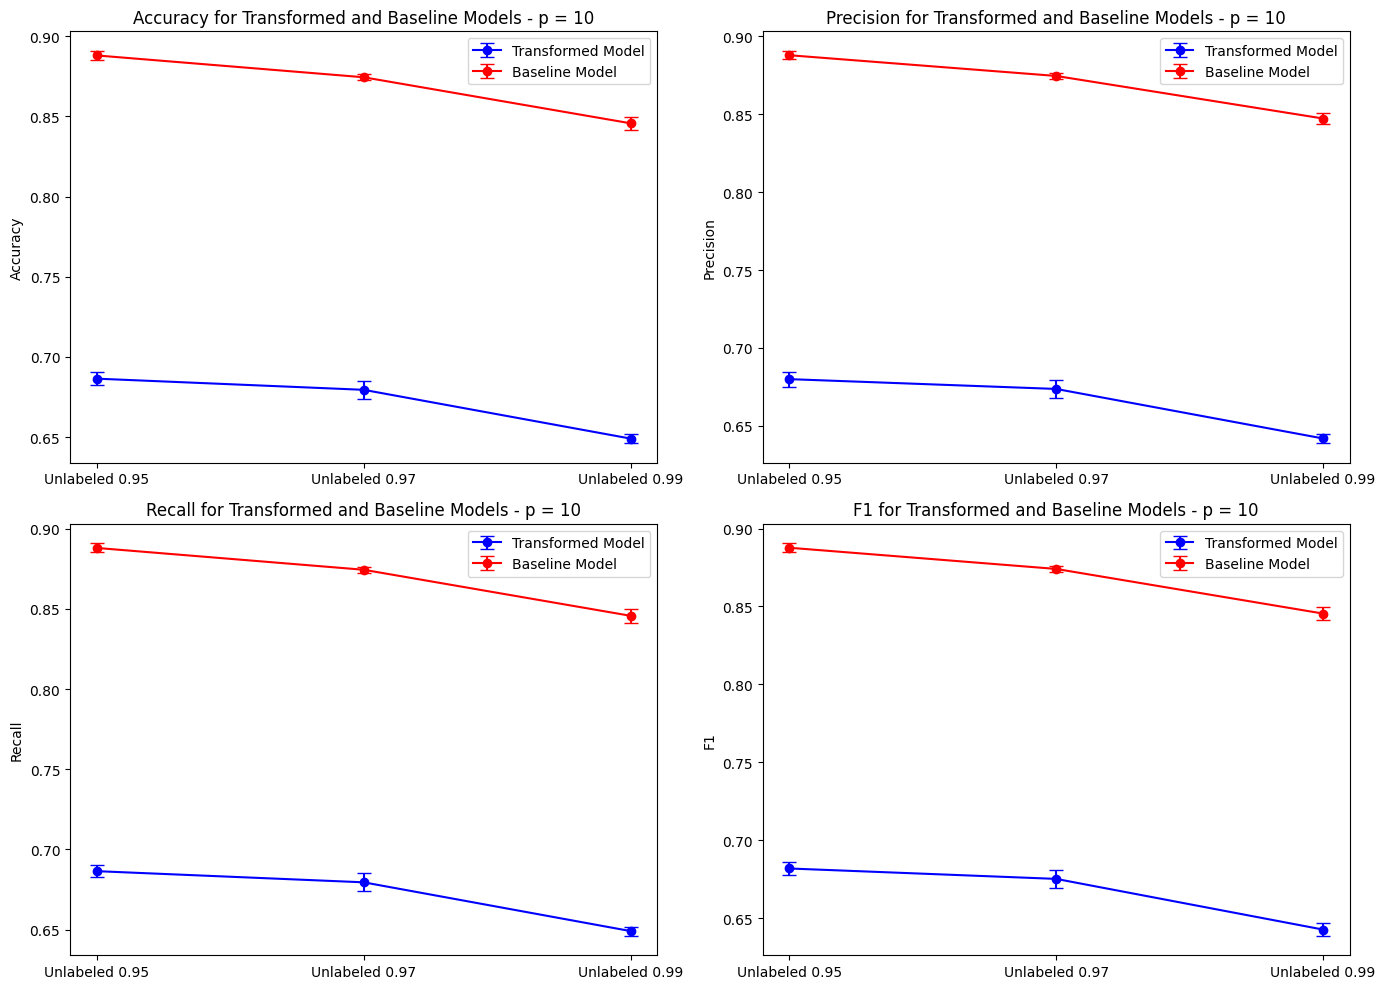

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant metrics (accuracy, precision, recall, f1) from results, results2, results3
metrics = ['accuracy', 'precision', 'recall', 'f1']
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']  # assuming 5-fold cross-validation

# Function to calculate means and std for error bars
def get_mean_std(results, metric):
    return np.mean(results[metric]), np.std(results[metric])

# Initialize lists to store mean and std for each metric
means = {metric: [] for metric in metrics}
stds = {metric: [] for metric in metrics}
baseline_means = {metric: [] for metric in metrics}
baseline_stds = {metric: [] for metric in metrics}

# Calculate mean and std for each metric (including baseline)
for metric in metrics:
    means[metric].append(get_mean_std(results11['transformed'], metric))
    means[metric].append(get_mean_std(results22['transformed'], metric))
    means[metric].append(get_mean_std(results33['transformed'], metric))

    baseline_means[metric].append(get_mean_std(results11['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results22['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results33['baseline'], metric))

    stds[metric].append(np.std(results11['transformed'][metric]))
    stds[metric].append(np.std(results22['transformed'][metric]))
    stds[metric].append(np.std(results33['transformed'][metric]))

    baseline_stds[metric].append(np.std(results11['baseline'][metric]))
    baseline_stds[metric].append(np.std(results22['baseline'][metric]))
    baseline_stds[metric].append(np.std(results33['baseline'][metric]))

# Create a figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop over the metrics and plot
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]  # Find the correct axis (2x2 grid)
    
    # Extract means and stds for the metric
    mean_values = [means[metric][0][0], means[metric][1][0], means[metric][2][0]]
    std_values = [stds[metric][0], stds[metric][1], stds[metric][2]]
    
    # Extract baseline means and stds
    baseline_mean_values = [baseline_means[metric][0][0], baseline_means[metric][1][0], baseline_means[metric][2][0]]
    baseline_std_values = [baseline_stds[metric][0], baseline_stds[metric][1], baseline_stds[metric][2]]
    
    # Plot transformed model with error bars
    ax.errorbar([0, 1, 2], mean_values, yerr=std_values, fmt='-o', color='blue', label='Transformed Model', capsize=5)
    
    # Plot baseline model with error bars
    ax.errorbar([0, 1, 2], baseline_mean_values, yerr=baseline_std_values, fmt='-o', color='red', label='Baseline Model', capsize=5)
    
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Unlabeled 0.95', 'Unlabeled 0.97', 'Unlabeled 0.99'])
    ax.set_title(f'{metric.capitalize()} for Transformed and Baseline Models - p = 10')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


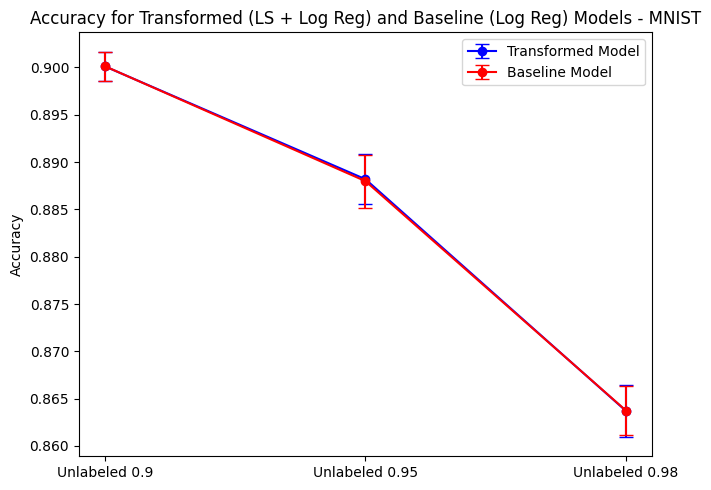

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Only accuracy metric
metrics = ['accuracy']
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']  # assuming 5-fold cross-validation

# Function to calculate means and std for error bars
def get_mean_std(results, metric):
    return np.mean(results[metric]), np.std(results[metric])

# Initialize lists to store mean and std for accuracy
means = {'accuracy': []}
stds = {'accuracy': []}
baseline_means = {'accuracy': []}
baseline_stds = {'accuracy': []}

# Calculate mean and std for accuracy (including baseline)
for metric in metrics:
    means[metric].append(get_mean_std(results11['transformed'], metric))
    means[metric].append(get_mean_std(results22['transformed'], metric))
    means[metric].append(get_mean_std(results33['transformed'], metric))

    baseline_means[metric].append(get_mean_std(results11['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results22['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results33['baseline'], metric))

    stds[metric].append(np.std(results11['transformed'][metric]))
    stds[metric].append(np.std(results22['transformed'][metric]))
    stds[metric].append(np.std(results33['transformed'][metric]))

    baseline_stds[metric].append(np.std(results11['baseline'][metric]))
    baseline_stds[metric].append(np.std(results22['baseline'][metric]))
    baseline_stds[metric].append(np.std(results33['baseline'][metric]))

# Create a figure
fig, ax = plt.subplots(figsize=(7, 5))

# Extract means and stds for accuracy
mean_values = [means['accuracy'][0][0], means['accuracy'][1][0], means['accuracy'][2][0]]
std_values = [stds['accuracy'][0], stds['accuracy'][1], stds['accuracy'][2]]

# Extract baseline means and stds
baseline_mean_values = [baseline_means['accuracy'][0][0], baseline_means['accuracy'][1][0], baseline_means['accuracy'][2][0]]
baseline_std_values = [baseline_stds['accuracy'][0], baseline_stds['accuracy'][1], baseline_stds['accuracy'][2]]

# Plot transformed model with error bars
ax.errorbar([0, 1, 2], mean_values, yerr=std_values, fmt='-o', color='blue', label='Transformed Model', capsize=5)

# Plot baseline model with error bars
ax.errorbar([0, 1, 2], baseline_mean_values, yerr=baseline_std_values, fmt='-o', color='red', label='Baseline Model', capsize=5)

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Unlabeled 0.9', 'Unlabeled 0.95', 'Unlabeled 0.98'])
ax.set_title('Accuracy for Transformed (LS + Log Reg) and Baseline (Log Reg) Models - MNIST')
ax.set_ylabel('Accuracy')
ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [48]:
# Using a smaller subset here to speed up testing
#X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X_mnist = X_mnist[:10000]
y_mnist = y_mnist[:10000]
if isinstance(X_mnist, pd.DataFrame): 
    X_mnist = X_mnist.values 
X_mnist = X_mnist / 255.0 


In [36]:
X1_mnist, X2_mnist = add_noise(X_mnist)

In [37]:
noisy1 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.95, concatenate=True, p=32, m=32)
noisy2 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.97, concatenate=True, p=32, m=32)
noisy3 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.99, concatenate=True, p=32, m=32)


--- Fold 1 ---
X1_train_unlabeled (7599, 784)
X2_train_unlabeled (7599, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 1: Accuracy=0.8465, Precision=0.8459, Recall=0.8465, F1=0.8438
[[201   0   1   0   0   1   3   1   0   0]
 [  0 208   3   0   1   1   0   0   3   0]
 [  3   4 175   2   4   3   6   3   3   1]
 [  4   5   6 151   0   8   2   4   6   6]
 [  1   2   1   0 186   0   3   5   4   9]
 [  4   7   1  30   3 114   2   1   7   7]
 [  5   2   2   0   3   4 203   0   1   0]
 [  1   7   4   1   3   0   1 194   0   5]
 [  2  10   8   9   2   3   1   2 123   6]
 [  2   2   0   3  25   1   0  18   2 139]]
Baseline Model - Fold 1: Accuracy=0.8470, Precision=0.8463, Recall=0.8470, F1=0.8444

--- Fold 2 ---
X1_train_unlabeled (7599, 784)
X2_train_unlabeled (7599, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 2: Accuracy=0.8405, Precision=0.8434, Recall=0.8405, F1=0.8385
[[184   0   4   2   0   0   9   0   3   0]
 [  0 227   0   0   0   2   0   0   3   0]
 [  4   8 159   0  10   0   7   2   6   4]
 [  0   5  11 173   0  10   1   2   7   5]
 [  0   5   1   0 165   0   6   0   0  19]
 [  3   2   1  28   9 101   4   0  12   4]
 [  0   2   1   0   5   2 162   0   1   0]
 [  0   5   2   2   8   0   1 199   2  12]
 [  5  10   3   7   4   4   5   0 140   5]
 [  5   0   0   3   7   1   0   3   4 182]]
Baseline Model - Fold 2: Accuracy=0.8460, Precision=0.8486, Recall=0.8460, F1=0.8442

--- Fold 3 ---
X1_train_unlabeled (7599, 784)
X2_train_unlabeled (7599, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 3: Accuracy=0.8305, Precision=0.8358, Recall=0.8305, F1=0.8301
[[181   0   2   4   1  13   1   1   2   1]
 [  0 224   1   0   1   1   0   1   2   0]
 [  2  15 143  11  13   3   2   5   5   2]
 [  3   6   3 152   0  20   1   3   3   3]
 [  0   3   0   0 172   0   0   2   2  19]
 [  9   2   1   9   6 133   3   1   3   3]
 [  4   4   5   1   9   5 192   0   1   0]
 [  1   5   1   4   5   0   0 172   1  13]
 [  1  13   5  17   6   8   1   2 126   6]
 [  5   0   0   1  14   2   0  10   1 160]]
Baseline Model - Fold 3: Accuracy=0.8275, Precision=0.8334, Recall=0.8275, F1=0.8269

--- Fold 4 ---
X1_train_unlabeled (7599, 784)
X2_train_unlabeled (7599, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 4: Accuracy=0.8360, Precision=0.8403, Recall=0.8360, F1=0.8357
[[181   0   1   0   0   5   2   1   1   1]
 [  0 204   2   3   0   3   1   1   1   2]
 [  0  14 154   2   6   0  10   2  18   1]
 [  1   8  11 167   3  19   0   1  14   7]
 [  0   0   3   0 155   4   3   3   0  12]
 [  1   4   4   6   8 145   2   1  14   1]
 [  3   4   6   0   0   6 182   0   1   0]
 [  2   7   0   1   4   2   0 167   4  11]
 [  0  12   0   6   1  10   3   2 156  11]
 [  2   1   2   4   7   0   1   5   4 160]]
Baseline Model - Fold 4: Accuracy=0.8355, Precision=0.8394, Recall=0.8355, F1=0.8352

--- Fold 5 ---
X1_train_unlabeled (7599, 784)
X2_train_unlabeled (7599, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 5: Accuracy=0.8330, Precision=0.8370, Recall=0.8330, F1=0.8322
[[176   0   1   4   3   4   2   0   4   0]
 [  0 222   0   0   5   0   0   1   4   0]
 [  2   4 144   9   4   1   1   8   3   3]
 [  0   3   4 165   1   5   4   6   4   9]
 [  0   1   1   1 181   0   2   2   1   6]
 [  2   4   4  23  13 109   1   1  10   0]
 [  4   3   7   0   5   0 177   0   2   0]
 [  3   1   2   1  17   1   0 186   0  12]
 [  2   3   8  12   3  14   2   1 158   6]
 [  0   3   2   5  25   6   0  14   1 146]]
Baseline Model - Fold 5: Accuracy=0.8320, Precision=0.8361, Recall=0.8320, F1=0.8313

--- Fold 1 ---
X1_train_unlabeled (7759, 784)
X2_train_unlabeled (7759, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 1: Accuracy=0.8140, Precision=0.8136, Recall=0.8140, F1=0.8089
[[199   0   0   0   0   5   3   0   0   0]
 [  0 209   2   0   1   0   0   0   4   0]
 [  4  11 167   5   1   4   4   3   4   1]
 [  5   7   5 146   0  11   1   7   5   5]
 [  0   3   1   1 183   0   3   2   5  13]
 [  6   8   1  24   7 115   2   0   6   7]
 [  4   4   2   0   3   5 200   0   2   0]
 [  1   4   3   2   4   0   0 199   0   3]
 [  1  17   6  16   3   8   1   3 106   5]
 [  3   5   0   4  37   1   0  36   4 102]]
Baseline Model - Fold 1: Accuracy=0.8130, Precision=0.8126, Recall=0.8130, F1=0.8078

--- Fold 2 ---
X1_train_unlabeled (7759, 784)
X2_train_unlabeled (7759, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 2: Accuracy=0.7950, Precision=0.8019, Recall=0.7950, F1=0.7932
[[182   0   5   2   0   3   7   1   2   0]
 [  0 226   0   0   0   1   0   0   5   0]
 [  2   9 139   2  20   0   5   2  15   6]
 [  2   5   6 159   1  14   2   5  12   8]
 [  0   5   1   0 156   0   6   0   2  26]
 [  4   3   1  33  15  95   5   0   4   4]
 [  0   5   1   0  10   3 152   0   2   0]
 [  2   8   3   0  12   0   0 179   2  25]
 [  4  14   3  13   5   6   5   0 127   6]
 [  4   0   1   6  10   0   0   3   4 177]]
Baseline Model - Fold 2: Accuracy=0.7960, Precision=0.8033, Recall=0.7960, F1=0.7944

--- Fold 3 ---
X1_train_unlabeled (7759, 784)
X2_train_unlabeled (7759, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 3: Accuracy=0.7940, Precision=0.8043, Recall=0.7940, F1=0.7925
[[176   0   1   3   2  13   6   2   3   0]
 [  0 225   1   0   1   0   0   0   3   0]
 [  5  25 124  16  10   1   4   5  10   1]
 [  3   8   2 152   0  21   0   3   3   2]
 [  1   4   0   0 169   0   1   1   1  21]
 [  4   4   0  18   4 124   4   5   3   4]
 [  6   5  10   1  25   5 166   0   3   0]
 [  1   8   1   4   6   0   0 166   0  16]
 [  1  13   2  16   7   7   1   2 129   7]
 [  5   1   0   0  18   1   0   9   2 157]]
Baseline Model - Fold 3: Accuracy=0.7940, Precision=0.8036, Recall=0.7940, F1=0.7926

--- Fold 4 ---
X1_train_unlabeled (7759, 784)
X2_train_unlabeled (7759, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 4: Accuracy=0.8035, Precision=0.8183, Recall=0.8035, F1=0.8048
[[170   0   2   0   0  11   6   1   1   1]
 [  0 205   2   2   0   3   0   1   2   2]
 [  0  13 163   1   5   0   8   2  13   2]
 [  1  10  10 173   1  20   0   1   9   6]
 [  0   1   3   0 125   5   6   2   4  34]
 [  0   5   2   8   3 135   2   0  24   7]
 [  1   4   9   0   0   7 179   0   2   0]
 [  0   8   1   2   5   3   0 144   5  30]
 [  0  15   0   7   1  14   3   2 147  12]
 [  3   1   2   2   4   1   1   2   0 170]]
Baseline Model - Fold 4: Accuracy=0.8055, Precision=0.8202, Recall=0.8055, F1=0.8067

--- Fold 5 ---
X1_train_unlabeled (7759, 784)
X2_train_unlabeled (7759, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 5: Accuracy=0.8200, Precision=0.8254, Recall=0.8200, F1=0.8189
[[178   0   2   1   1   6   2   0   4   0]
 [  0 227   0   2   1   0   0   1   1   0]
 [  3   5 149   4   6   2   1   5   3   1]
 [  0   2   4 162   1  12   4   5   2   9]
 [  0   2   2   1 178   1   2   2   0   7]
 [  5   3   4  21  14 108   1   1  10   0]
 [  4   6   7   0   4   2 172   0   3   0]
 [  1   2   2   1  22   0   0 182   0  13]
 [  3  13   5  15   3  10   3   1 153   3]
 [  0   3   2   4  37   4   0  15   3 134]]
Baseline Model - Fold 5: Accuracy=0.8215, Precision=0.8269, Recall=0.8215, F1=0.8203

--- Fold 1 ---
X1_train_unlabeled (7919, 784)
X2_train_unlabeled (7919, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 1: Accuracy=0.7220, Precision=0.7366, Recall=0.7220, F1=0.7022
[[188   1   1   0   0   2   5   7   3   0]
 [  0 211   1   0   4   0   0   0   0   0]
 [  5  35 130   2   6   0   5   7  14   0]
 [  5  10  16 122   2   8   6   9   9   5]
 [  0   3   1   0 192   1   0   4   4   6]
 [ 14  16   2  36   9  70   5   4  17   3]
 [  6   4   2   0  11   2 193   0   2   0]
 [  0  10   1   0   7   0   1 191   0   6]
 [  8  27   5  12   1   1   1   6 103   2]
 [  2   6   0   3  37   0   0  92   8  44]]
Baseline Model - Fold 1: Accuracy=0.7220, Precision=0.7350, Recall=0.7220, F1=0.7022

--- Fold 2 ---
X1_train_unlabeled (7919, 784)
X2_train_unlabeled (7919, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 2: Accuracy=0.6500, Precision=0.7336, Recall=0.6500, F1=0.6321
[[190   0   0   0   0   0   8   0   2   2]
 [  0 188   0  11  17   0   0   0  16   0]
 [ 24  12  37  12  43   0  13   1  39  19]
 [ 13   4   0 144   3   4   4   0  28  14]
 [  0   4   0   0 139   0   1   0   1  51]
 [ 22   1   0  19  16  86   6   0   5   9]
 [  8   5   0   0  15   3 131   0   3   8]
 [  9   7   0   1  11   0   1  79   2 121]
 [  7  16   0  10   7   7   4   0 119  13]
 [  7   0   0   3   4   0   0   2   4 185]]
Baseline Model - Fold 2: Accuracy=0.6490, Precision=0.7349, Recall=0.6490, F1=0.6315

--- Fold 3 ---
X1_train_unlabeled (7919, 784)
X2_train_unlabeled (7919, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 3: Accuracy=0.6655, Precision=0.7224, Recall=0.6655, F1=0.6493
[[155   0   1   0   2  40   2   1   3   2]
 [  0 216   1   0   1  12   0   0   0   0]
 [  4  29 111   4  27   4   1   3  13   5]
 [  9  15   6  20   1 106   0   1  28   8]
 [  0   4   0   0 175   2   0   0   1  16]
 [  5   2   0   0  14 140   1   1   4   3]
 [  5  17  10   1  40  32 107   0   9   0]
 [  2   6   7   0   7   0   0 153   0  27]
 [  1  18   1   5   9  20   0   2 123   6]
 [  4   2   0   0  40   1   0   7   2 137]]
Baseline Model - Fold 3: Accuracy=0.6685, Precision=0.7264, Recall=0.6685, F1=0.6529

--- Fold 4 ---
X1_train_unlabeled (7919, 784)
X2_train_unlabeled (7919, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 4: Accuracy=0.6470, Precision=0.7009, Recall=0.6470, F1=0.6386
[[120   0   2  12   0  31  23   0   3   1]
 [  0 198  12   2   0   1   0   0   2   2]
 [  0  15 134   5  10   1  26   1  13   2]
 [  0  16  10 187   0   7   1   0   6   4]
 [  0   4   0   0 100   5  19   0   6  46]
 [  0  22   4  34   1  84  20   0   3  18]
 [  0   5   5   1   0  23 168   0   0   0]
 [  0  12   0  10  18   2   1  44   6 105]
 [  0  18   2  10   0  22  11   0 122  16]
 [  0   6   0   9  24   8   1   2   2 134]]
Baseline Model - Fold 4: Accuracy=0.6455, Precision=0.7007, Recall=0.6455, F1=0.6372

--- Fold 5 ---
X1_train_unlabeled (7919, 784)
X2_train_unlabeled (7919, 784)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/decomposition/_truncated_svd.py:275: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = exp_var / full_var


Transformed Model - Fold 5: Accuracy=0.6975, Precision=0.7170, Recall=0.6975, F1=0.6909
[[181   0   5   1   1   0   3   1   2   0]
 [  0 225   3   0   2   0   0   0   0   2]
 [  2  12 141   8   4   3   1   6   2   0]
 [  1  16   6 127   7  15   1   4  14  10]
 [  0   4   4   0 159   0   0   0   0  28]
 [  8  20   4  15  21  77   3   0  18   1]
 [  8  28  28   0   7   3 117   0   7   0]
 [  6   5   1   0  15   1   0 168   0  27]
 [  6  40   5  31   9   4   2   2  89  21]
 [  0   5   4   2  60   1   0  11   3 116]]
Baseline Model - Fold 5: Accuracy=0.7000, Precision=0.7195, Recall=0.7000, F1=0.6934


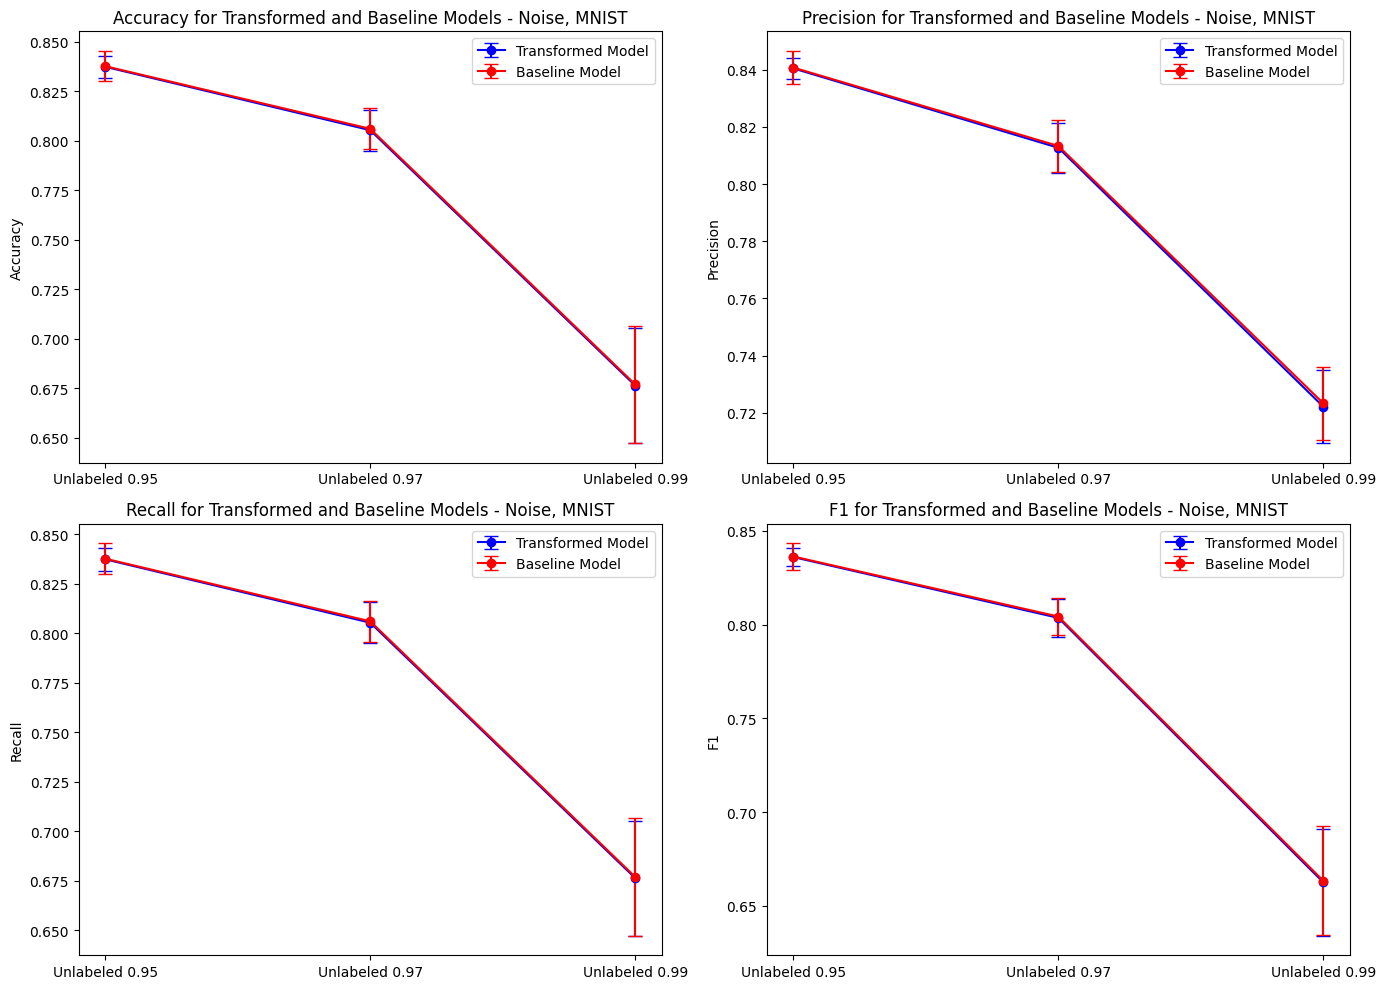

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant metrics (accuracy, precision, recall, f1) from results, results2, results3
metrics = ['accuracy', 'precision', 'recall', 'f1']
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']  # assuming 5-fold cross-validation

# Function to calculate means and std for error bars
def get_mean_std(results, metric):
    return np.mean(results[metric]), np.std(results[metric])

# Initialize lists to store mean and std for each metric
means = {metric: [] for metric in metrics}
stds = {metric: [] for metric in metrics}
baseline_means = {metric: [] for metric in metrics}
baseline_stds = {metric: [] for metric in metrics}

# Calculate mean and std for each metric (including baseline)
for metric in metrics:
    means[metric].append(get_mean_std(noisy1['transformed'], metric))
    means[metric].append(get_mean_std(noisy2['transformed'], metric))
    means[metric].append(get_mean_std(noisy3['transformed'], metric))

    baseline_means[metric].append(get_mean_std(noisy1['baseline'], metric))
    baseline_means[metric].append(get_mean_std(noisy2['baseline'], metric))
    baseline_means[metric].append(get_mean_std(noisy3['baseline'], metric))

    stds[metric].append(np.std(noisy1['transformed'][metric]))
    stds[metric].append(np.std(noisy2['transformed'][metric]))
    stds[metric].append(np.std(noisy3['transformed'][metric]))

    baseline_stds[metric].append(np.std(noisy1['baseline'][metric]))
    baseline_stds[metric].append(np.std(noisy2['baseline'][metric]))
    baseline_stds[metric].append(np.std(noisy3['baseline'][metric]))

# Create a figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop over the metrics and plot
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]  # Find the correct axis (2x2 grid)
    
    # Extract means and stds for the metric
    mean_values = [means[metric][0][0], means[metric][1][0], means[metric][2][0]]
    std_values = [stds[metric][0], stds[metric][1], stds[metric][2]]
    
    # Extract baseline means and stds
    baseline_mean_values = [baseline_means[metric][0][0], baseline_means[metric][1][0], baseline_means[metric][2][0]]
    baseline_std_values = [baseline_stds[metric][0], baseline_stds[metric][1], baseline_stds[metric][2]]
    
    # Plot transformed model with error bars
    ax.errorbar([0, 1, 2], mean_values, yerr=std_values, fmt='-o', color='blue', label='Transformed Model', capsize=5)
    
    # Plot baseline model with error bars
    ax.errorbar([0, 1, 2], baseline_mean_values, yerr=baseline_std_values, fmt='-o', color='red', label='Baseline Model', capsize=5)
    
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Unlabeled 0.95', 'Unlabeled 0.97', 'Unlabeled 0.99'])
    ax.set_title(f'{metric.capitalize()} for Transformed and Baseline Models - Noise, MNIST')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
# Using a smaller subset here to speed up testing
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X_mnist = X_mnist[:10000]
y_mnist = y_mnist[:10000]
if isinstance(X_mnist, pd.DataFrame): 
    X_mnist = X_mnist.values 
X_mnist = X_mnist / 255.0 


In [ ]:
X1_mnist, X2_mnist = add_noise(X_mnist)

In [ ]:
m1 = cross_validate_linear_subspace(dataset_F1=X1_mnist, dataset_F2=X2_mnist, labels=y_mnist, unlabeled_proportion=.95, concatenate=True, p=32, m=32)

## Australia dataset

In [22]:
data = pd.read_csv('data/australian.dat', sep=' ', header=None)

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values  # Last column as the target variable

X1, X2 = create_views_pca(X, n_components=14)

In [18]:
results_australia1 = cross_validate_linear_subspace(dataset_F1=X1, dataset_F2=X2, labels=y, unlabeled_proportion=.95, concatenate=True, p=7, m=7)
results_australia2 = cross_validate_linear_subspace(dataset_F1=X1, dataset_F2=X2, labels=y, unlabeled_proportion=.97, concatenate=True, p=7, m=7)
results_australia3 = cross_validate_linear_subspace(dataset_F1=X1, dataset_F2=X2, labels=y, unlabeled_proportion=.99, concatenate=True, p=7, m=7)


--- Fold 1 ---
X1_train_unlabeled (524, 7)
X2_train_unlabeled (524, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Transformed Model - Fold 1: Accuracy=0.6449, Precision=0.6720, Recall=0.6449, F1=0.6509
[[56 31]
 [17 34]]
Baseline Model - Fold 1: Accuracy=0.6522, Precision=0.6769, Recall=0.6522, F1=0.6579

--- Fold 2 ---
X1_train_unlabeled (524, 7)
X2_train_unlabeled (524, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Transformed Model - Fold 2: Accuracy=0.7971, Precision=0.7977, Recall=0.7971, F1=0.7946
[[70  9]
 [17 42]]
Baseline Model - Fold 2: Accuracy=0.8116, Precision=0.8127, Recall=0.8116, F1=0.8093

--- Fold 3 ---
X1_train_unlabeled (524, 7)
X2_train_unlabeled (524, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Transformed Model - Fold 3: Accuracy=0.7464, Precision=0.7468, Recall=0.7464, F1=0.7465
[[55 20]
 [17 46]]
Baseline Model - Fold 3: Accuracy=0.7319, Precision=0.7333, Recall=0.7319, F1=0.7323

--- Fold 4 ---
X1_train_unlabeled (524, 7)
X2_train_unlabeled (524, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Transformed Model - Fold 4: Accuracy=0.5435, Precision=0.5434, Recall=0.5435, F1=0.5411
[[43 27]
 [34 34]]
Baseline Model - Fold 4: Accuracy=0.5580, Precision=0.5579, Recall=0.5580, F1=0.5565

--- Fold 5 ---
X1_train_unlabeled (524, 7)
X2_train_unlabeled (524, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Transformed Model - Fold 5: Accuracy=0.8261, Precision=0.8292, Recall=0.8261, F1=0.8261
[[56 16]
 [10 56]]
Baseline Model - Fold 5: Accuracy=0.8116, Precision=0.8147, Recall=0.8116, F1=0.8116

--- Fold 1 ---
X1_train_unlabeled (535, 7)
X2_train_unlabeled (535, 7)
Transformed Model - Fold 1: Accuracy=0.6667, Precision=0.6595, Recall=0.6667, F1=0.6618
[[71 16]
 [27 24]]
Baseline Model - Fold 1: Accuracy=0.6884, Precision=0.6785, Recall=0.6884, F1=0.6788

--- Fold 2 ---
X1_train_unlabeled (535, 7)
X2_train_unlabeled (535, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Transformed Model - Fold 2: Accuracy=0.6667, Precision=0.6682, Recall=0.6667, F1=0.6673
[[56 23]
 [24 35]]
Baseline Model - Fold 2: Accuracy=0.6594, Precision=0.6587, Recall=0.6594, F1=0.6590

--- Fold 3 ---
X1_train_unlabeled (535, 7)
X2_train_unlabeled (535, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Transformed Model - Fold 3: Accuracy=0.6304, Precision=0.6389, Recall=0.6304, F1=0.6306
[[45 30]
 [19 44]]
Baseline Model - Fold 3: Accuracy=0.6449, Precision=0.6536, Recall=0.6449, F1=0.6451

--- Fold 4 ---
X1_train_unlabeled (535, 7)
X2_train_unlabeled (535, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Transformed Model - Fold 4: Accuracy=0.5435, Precision=0.5441, Recall=0.5435, F1=0.5373
[[46 24]
 [34 34]]
Baseline Model - Fold 4: Accuracy=0.5797, Precision=0.5805, Recall=0.5797, F1=0.5770

--- Fold 5 ---
X1_train_unlabeled (535, 7)
X2_train_unlabeled (535, 7)


/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/sal/Desktop/csds440project-f24-2/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Transformed Model - Fold 5: Accuracy=0.8188, Precision=0.8229, Recall=0.8188, F1=0.8188
[[55 17]
 [11 55]]
Baseline Model - Fold 5: Accuracy=0.7971, Precision=0.8001, Recall=0.7971, F1=0.7971

--- Fold 1 ---
X1_train_unlabeled (546, 7)
X2_train_unlabeled (546, 7)
Transformed Model - Fold 1: Accuracy=0.6014, Precision=0.5653, Recall=0.6014, F1=0.5667
[[72 15]
 [39 12]]
Baseline Model - Fold 1: Accuracy=0.6087, Precision=0.5732, Recall=0.6087, F1=0.5722

--- Fold 2 ---
X1_train_unlabeled (546, 7)
X2_train_unlabeled (546, 7)
Transformed Model - Fold 2: Accuracy=0.7391, Precision=0.7468, Recall=0.7391, F1=0.7290
[[70  9]
 [27 32]]
Baseline Model - Fold 2: Accuracy=0.7391, Precision=0.7468, Recall=0.7391, F1=0.7290

--- Fold 3 ---
X1_train_unlabeled (546, 7)
X2_train_unlabeled (546, 7)
Transformed Model - Fold 3: Accuracy=0.5290, Precision=0.5321, Recall=0.5290, F1=0.5299
[[40 35]
 [30 33]]
Baseline Model - Fold 3: Accuracy=0.5290, Precision=0.5321, Recall=0.5290, F1=0.5299

--- Fold 4 ---


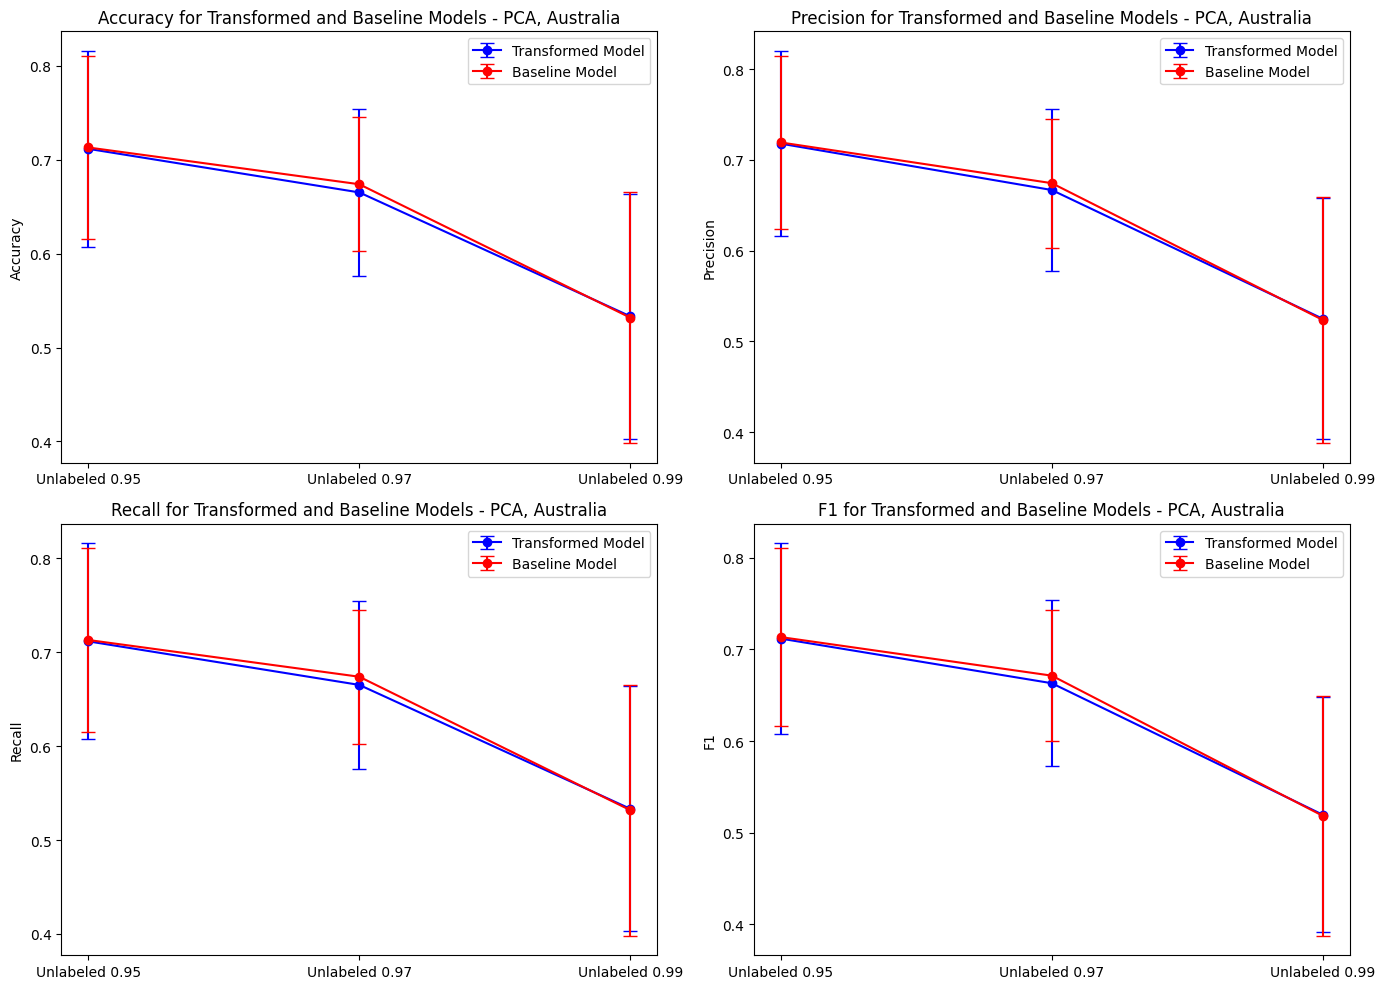

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant metrics (accuracy, precision, recall, f1) from results, results2, results3
metrics = ['accuracy', 'precision', 'recall', 'f1']
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']  # assuming 5-fold cross-validation

# Function to calculate means and std for error bars
def get_mean_std(results, metric):
    return np.mean(results[metric]), np.std(results[metric])

# Initialize lists to store mean and std for each metric
means = {metric: [] for metric in metrics}
stds = {metric: [] for metric in metrics}
baseline_means = {metric: [] for metric in metrics}
baseline_stds = {metric: [] for metric in metrics}

# Calculate mean and std for each metric (including baseline)
for metric in metrics:
    means[metric].append(get_mean_std(results_australia1['transformed'], metric))
    means[metric].append(get_mean_std(results_australia2['transformed'], metric))
    means[metric].append(get_mean_std(results_australia3['transformed'], metric))

    baseline_means[metric].append(get_mean_std(results_australia1['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results_australia2['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results_australia3['baseline'], metric))

    stds[metric].append(np.std(results_australia1['transformed'][metric]))
    stds[metric].append(np.std(results_australia2['transformed'][metric]))
    stds[metric].append(np.std(results_australia3['transformed'][metric]))

    baseline_stds[metric].append(np.std(results_australia1['baseline'][metric]))
    baseline_stds[metric].append(np.std(results_australia2['baseline'][metric]))
    baseline_stds[metric].append(np.std(results_australia3['baseline'][metric]))

# Create a figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop over the metrics and plot
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]  # Find the correct axis (2x2 grid)
    
    # Extract means and stds for the metric
    mean_values = [means[metric][0][0], means[metric][1][0], means[metric][2][0]]
    std_values = [stds[metric][0], stds[metric][1], stds[metric][2]]
    
    # Extract baseline means and stds
    baseline_mean_values = [baseline_means[metric][0][0], baseline_means[metric][1][0], baseline_means[metric][2][0]]
    baseline_std_values = [baseline_stds[metric][0], baseline_stds[metric][1], baseline_stds[metric][2]]
    
    # Plot transformed model with error bars
    ax.errorbar([0, 1, 2], mean_values, yerr=std_values, fmt='-o', color='blue', label='Transformed Model', capsize=5)
    
    # Plot baseline model with error bars
    ax.errorbar([0, 1, 2], baseline_mean_values, yerr=baseline_std_values, fmt='-o', color='red', label='Baseline Model', capsize=5)
    
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Unlabeled 0.95', 'Unlabeled 0.97', 'Unlabeled 0.99'])
    ax.set_title(f'{metric.capitalize()} for Transformed and Baseline Models - PCA, Australia')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [27]:
X1, X2 = create_views_kernel_pca(X, n_components=14)

In [29]:
results_australia_kpca1 = cross_validate_linear_subspace(dataset_F1=X1, dataset_F2=X2, labels=y, unlabeled_proportion=.95, concatenate=True, p=7, m=7)
results_australia_kpca2 = cross_validate_linear_subspace(dataset_F1=X1, dataset_F2=X2, labels=y, unlabeled_proportion=.97, concatenate=True, p=7, m=7)
results_australia_kpca3 = cross_validate_linear_subspace(dataset_F1=X1, dataset_F2=X2, labels=y, unlabeled_proportion=.99, concatenate=True, p=7, m=7)



--- Fold 1 ---
X1_train_unlabeled (524, 14)
X2_train_unlabeled (524, 14)
Transformed Model - Fold 1: Accuracy=0.8043, Precision=0.8025, Recall=0.8043, F1=0.8030
[[75 12]
 [16 35]]
Baseline Model - Fold 1: Accuracy=0.7971, Precision=0.7948, Recall=0.7971, F1=0.7952

--- Fold 2 ---
X1_train_unlabeled (524, 14)
X2_train_unlabeled (524, 14)
Transformed Model - Fold 2: Accuracy=0.7899, Precision=0.7897, Recall=0.7899, F1=0.7877
[[67 12]
 [18 41]]
Baseline Model - Fold 2: Accuracy=0.7826, Precision=0.7820, Recall=0.7826, F1=0.7808

--- Fold 3 ---
X1_train_unlabeled (524, 14)
X2_train_unlabeled (524, 14)
Transformed Model - Fold 3: Accuracy=0.7681, Precision=0.7719, Recall=0.7681, F1=0.7686
[[57 18]
 [10 53]]
Baseline Model - Fold 3: Accuracy=0.7971, Precision=0.8031, Recall=0.7971, F1=0.7974

--- Fold 4 ---
X1_train_unlabeled (524, 14)
X2_train_unlabeled (524, 14)
Transformed Model - Fold 4: Accuracy=0.7391, Precision=0.7621, Recall=0.7391, F1=0.7341
[[43 27]
 [ 9 59]]
Baseline Model - Fold

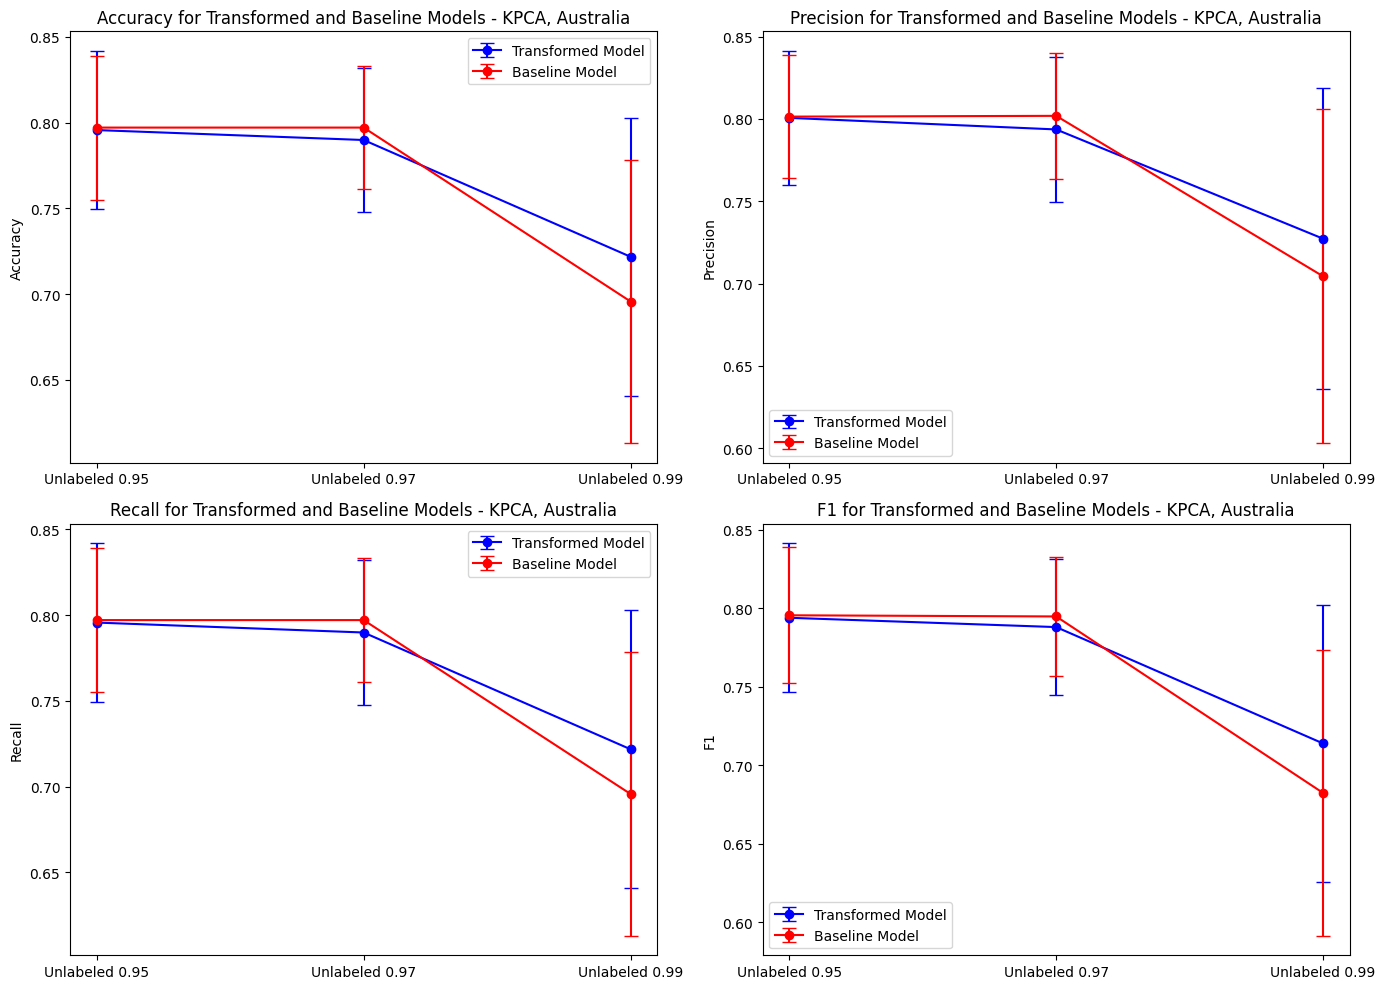

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant metrics (accuracy, precision, recall, f1) from results, results2, results3
metrics = ['accuracy', 'precision', 'recall', 'f1']
folds = ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5']  # assuming 5-fold cross-validation

# Function to calculate means and std for error bars
def get_mean_std(results, metric):
    return np.mean(results[metric]), np.std(results[metric])

# Initialize lists to store mean and std for each metric
means = {metric: [] for metric in metrics}
stds = {metric: [] for metric in metrics}
baseline_means = {metric: [] for metric in metrics}
baseline_stds = {metric: [] for metric in metrics}

# Calculate mean and std for each metric (including baseline)
for metric in metrics:
    means[metric].append(get_mean_std(results_australia_kpca1['transformed'], metric))
    means[metric].append(get_mean_std(results_australia_kpca2['transformed'], metric))
    means[metric].append(get_mean_std(results_australia_kpca3['transformed'], metric))

    baseline_means[metric].append(get_mean_std(results_australia_kpca1['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results_australia_kpca2['baseline'], metric))
    baseline_means[metric].append(get_mean_std(results_australia_kpca3['baseline'], metric))

    stds[metric].append(np.std(results_australia_kpca1['transformed'][metric]))
    stds[metric].append(np.std(results_australia_kpca2['transformed'][metric]))
    stds[metric].append(np.std(results_australia_kpca3['transformed'][metric]))

    baseline_stds[metric].append(np.std(results_australia_kpca1['baseline'][metric]))
    baseline_stds[metric].append(np.std(results_australia_kpca2['baseline'][metric]))
    baseline_stds[metric].append(np.std(results_australia_kpca3['baseline'][metric]))

# Create a figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Loop over the metrics and plot
for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]  # Find the correct axis (2x2 grid)
    
    # Extract means and stds for the metric
    mean_values = [means[metric][0][0], means[metric][1][0], means[metric][2][0]]
    std_values = [stds[metric][0], stds[metric][1], stds[metric][2]]
    
    # Extract baseline means and stds
    baseline_mean_values = [baseline_means[metric][0][0], baseline_means[metric][1][0], baseline_means[metric][2][0]]
    baseline_std_values = [baseline_stds[metric][0], baseline_stds[metric][1], baseline_stds[metric][2]]
    
    # Plot transformed model with error bars
    ax.errorbar([0, 1, 2], mean_values, yerr=std_values, fmt='-o', color='blue', label='Transformed Model', capsize=5)
    
    # Plot baseline model with error bars
    ax.errorbar([0, 1, 2], baseline_mean_values, yerr=baseline_std_values, fmt='-o', color='red', label='Baseline Model', capsize=5)
    
    ax.set_xticks([0, 1, 2])
    ax.set_xticklabels(['Unlabeled 0.95', 'Unlabeled 0.97', 'Unlabeled 0.99'])
    ax.set_title(f'{metric.capitalize()} for Transformed and Baseline Models - KPCA, Australia')
    ax.set_ylabel(metric.capitalize())
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
data = pd.read_csv('data/australian.dat', sep=' ', header=None)

# Separate features (X) and labels (y)
X = data.iloc[:, :-1].values  # All columns except the last one as features
y = data.iloc[:, -1].values  # Last column as the target variable

X1, X2 = create_views_kernel_pca(X, n_components=14)

## KR vs KP dataset